# Kaggle Competitions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import numpy as np

color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew #for some statistics
def ignore_warn(*args, **kwargs):
    pass
#warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
os.getcwd()


'M:\\Python\\Jupyter\\kaggles-master'

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
cols1=df_train.columns.values.tolist()
cols2=df_test.columns.values.tolist()
cols3=cols1+cols2

In [5]:
un=[]
for i in cols3:
    if cols3.count(i)==1:
        un.append(i)
print (df_train.columns)
un

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

['SalePrice']

In [7]:
train_id=df_train['Id']
test_id=df_test['Id']

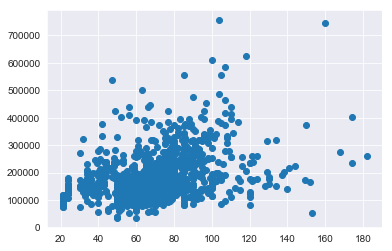

In [8]:
# Remove 2 apparent outliers

fig, ax=plt.subplots()
df_train1 = df_train.drop(df_train[(df_train['LotFrontage']>300) & (df_train['SalePrice']<300000)].index)
ax.scatter(x=df_train1['LotFrontage'],y=df_train1['SalePrice'])
plt.show()

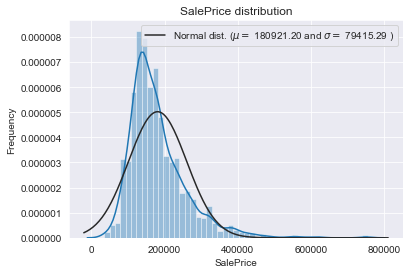

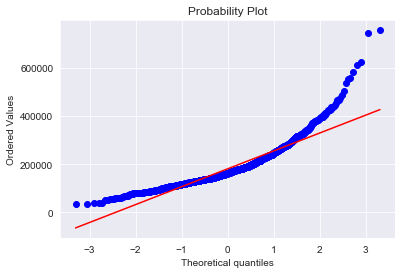

In [9]:
sns.distplot(df_train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(df_train['SalePrice'])
#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



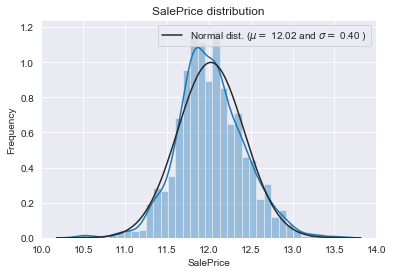

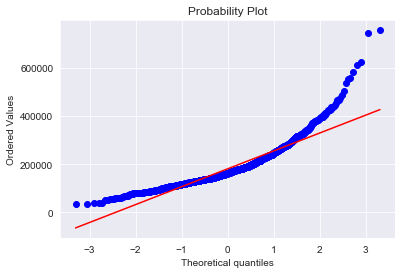

In [10]:
#Transform

df_train1['SalePrice']=np.log1p(df_train['SalePrice'])
sns.distplot(df_train1['SalePrice'] , fit=norm);
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_train1['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

## Concatenate
Concatenate and perform column datat ajustment

In [11]:
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train1.SalePrice.values
all_data = pd.concat((df_train1, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 80)


C:\Users\ekambulow\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


## Evaluate Missing Data

In [12]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
print(missing_data.shape)
missing_data.head(20)

(30, 1)


,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


Text(0.5,1,'Percent missing data by feature')

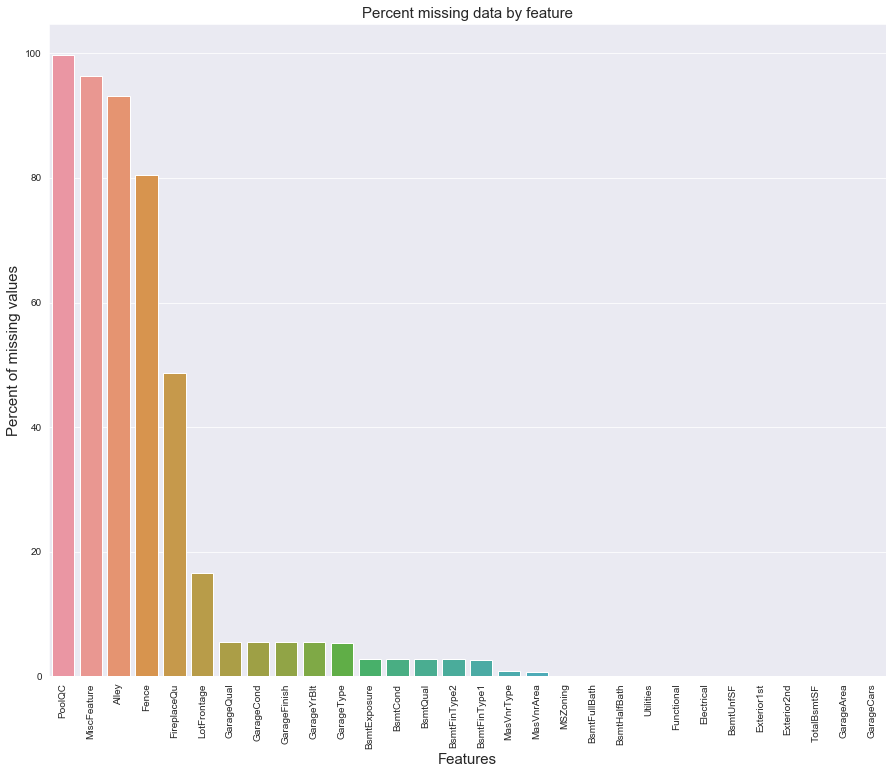

In [13]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

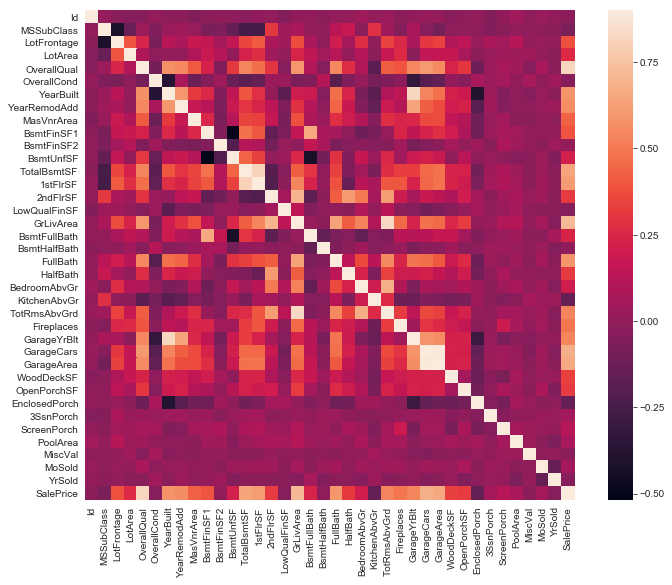

In [14]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df_train1.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

## Fill Data for nones

In [200]:
#Replace by None - Based on Description
cols=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageType','GarageFinish']
bcols=['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
gcols=['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
mcols=['MasVnrType','MSSubClass']
for col in cols+bcols+gcols+mcols:
    all_data[col]=all_data[col].fillna('None')
    
#Replace by 0 - Based on Descriptions
b0cols=['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
g0cols=['GarageYrBlt', 'GarageArea', 'GarageCars']
m0cols=['MasVnrArea']
for col in b0cols+g0cols+m0cols:
    all_data[col]=all_data[col].fillna(0)

#Replace by Mode since high frequency
mmcols=['Functional','SaleType', 'KitchenQual','Exterior2nd','Exterior1st','Electrical','MSZoning']
for col in mmcols:
    all_data[col]=all_data[col].fillna(all_data[col].mode()[0])

#Replace by Median in Neiborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

#Utilities has information that is not Used
#all_data.drop(['Utilities'],axis=1)

In [197]:
import math
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
all_data_na_cols=all_data_na.index.tolist()
dl=[]
for col in all_data_na_cols:
    m=all_data[col].mode().iloc[0]
    mia=all_data_na[col]
    vc=math.trunc(all_data[col].value_counts().iloc[0]/len(all_data)*100)
    dl.append((col,mia,m,vc))
missing_data=pd.DataFrame(dl,columns=['Column','Missing Ratio','Mode','Percent'])
print("Shape :",missing_data.shape)
missing_data

Shape : (1, 4)


,Column,Missing Ratio,Mode,Percent
0,Utilities,0.068564,AllPub,99


In [191]:
mode_data
missing_data['Column'].tolist()
missing_data

,Column,Missing Ratio,Mode,Percent
0,LotFrontage,16.660953,60,9
1,Utilities,0.068564,AllPub,99


## Converting Year Date into Datetime

In [ ]:
df = df_train[['YrSold','MoSold','SalePrice']]
df=df.astype(str)
df['Date']=pd.to_datetime(df['YrSold']+df['MoSold']+df['MoSold'],format="%Y%m%d")
df.set_index('Date',inplace=True)
df=df.drop(columns=['YrSold','MoSold'])
df=df.sort_index()
df['SalePrice']=df['SalePrice'].astype(float)
df['LogSalePrice']=np.log1p(df['SalePrice'])
df.plot()
filt=df.groupby(df.index).mean()
filt.plot()
df.head()

In [ ]:
df['SalePrice']

In [ ]:
pd.pandas.to_datetime(all_data['YrSold'])

## labele Encoding Categorical Values

In [214]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
all_data_trans=all_data.copy()
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data_trans[c] = lbl.transform(list(all_data[c].values))

# shape        
#print('Shape all_data: {}'.format(all_data_trns.shape))

In [218]:
all_data_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 80 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            2917 non-null int64
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2917 non-null int64
BsmtExposure     2917 non-null int64
BsmtFinSF1       2917 non-null float64
BsmtFinSF2       2917 non-null float64
BsmtFinType1     2917 non-null int64
BsmtFinType2     2917 non-null int64
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2917 non-null int64
BsmtUnfSF        2917 non-null float64
CentralAir       2917 non-null int64
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2917 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null int64
ExterQual        2917 non-null int64
Exterior1st      2917 non-nu

## Dealing with Skew in the data

In [219]:
#MSSubClass=The building class
all_data_trans['MSSubClass'] = all_data_trans['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data_trans['OverallCond'] = all_data_trans['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data_trans['YrSold'] = all_data_trans['YrSold'].astype(str)
all_data_trans['MoSold'] = all_data_trans['MoSold'].astype(str)

In [241]:
numeric_feats = all_data_trans.dtypes[all_data.dtypes != "object"].index
all_data_trans.dtypes.value_counts()
# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.058210
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


In [245]:
all_data.

<bound method DataFrame.melt of       1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
0          856       854          0  None             3     1Fam       TA   
1         1262         0          0  None             3     1Fam       TA   
2          920       866          0  None             3     1Fam       TA   
3          961       756          0  None             3     1Fam       Gd   
4         1145      1053          0  None             4     1Fam       TA   
5          796       566        320  None             1     1Fam       TA   
6         1694         0          0  None             3     1Fam       TA   
7         1107       983          0  None             3     1Fam       TA   
8         1022       752          0  None             2     1Fam       TA   
9         1077         0          0  None             2   2fmCon       TA   
10        1040         0          0  None             3     1Fam       TA   
11        1182      1142          0  None   

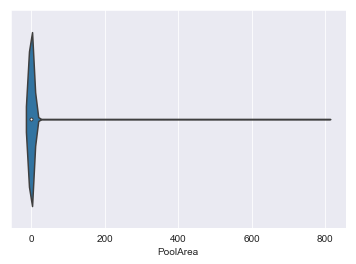

In [243]:
ax=sns.violinplot(datax=all_data['PoolArea'])

##  Reference Material

1.  Python datamaninpuation reference (https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/)